In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
import sklearn.preprocessing
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, StratifiedKFold
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [75]:
def one_hot_encode(df):
    precision = pd.get_dummies(df.precision)
    fwd_algo = pd.get_dummies(df.fwd_algo)
    df.drop(columns=['precision', 'fwd_algo'], inplace=True)
    df = pd.concat([df, precision, fwd_algo], axis=1)
    return df

In [100]:
def normalize(X, y):
    ss = StandardScaler()
    X = pd.DataFrame(ss.fit_transform(X))
    y = pd.Series(ss.fit_transform(np.array(y).reshape(-1,1))[:,0])
    return X, y

In [77]:
df = pd.read_csv('results/cudnn/2070_conv.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19573 entries, 0 to 19572
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   w               19573 non-null  int64  
 1   h               19573 non-null  int64  
 2   c               19573 non-null  int64  
 3   n               19573 non-null  int64  
 4   k               19573 non-null  int64  
 5   f_w             19573 non-null  int64  
 6   f_h             19573 non-null  int64  
 7   pad_w           19573 non-null  int64  
 8   pad_h           19573 non-null  int64  
 9   stride_w        19573 non-null  int64  
 10  stride_h        19573 non-null  int64  
 11  precision       19573 non-null  object 
 12  fwd_time(usec)  19573 non-null  int64  
 13  fwd_algo        19573 non-null  object 
 14  pad_kernels     19573 non-null  float64
dtypes: float64(1), int64(12), object(2)
memory usage: 2.2+ MB


In [78]:
df.describe()


,w,h,c,n,k,f_w,f_h,pad_w,pad_h,stride_w,stride_h,fwd_time(usec),pad_kernels
count,19573.000000,19573.000000,19573.000000,19573.000000,19573.000000,19573.000000,19573.000000,19573.000000,19573.000000,19573.000000,19573.000000,19573.000000,19573.000000
mean,237.646196,185.304705,21.689572,17.294487,18.183518,3.796301,3.796301,0.551678,0.558167,2.582946,2.573903,1559.899811,0.139273
std,213.239861,154.717238,34.059191,20.862286,21.101103,1.117436,1.117436,0.497335,0.496618,1.501491,1.494802,9513.636887,0.346241
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,4.000000,0.000000
25%,64.000000,64.000000,2.000000,2.000000,2.000000,3.000000,3.000000,0.000000,0.000000,1.000000,1.000000,13.000000,0.000000
50%,240.000000,160.000000,8.000000,8.000000,8.000000,3.000000,3.000000,1.000000,1.000000,2.000000,2.000000,61.000000,0.000000
75%,320.000000,300.000000,32.000000,32.000000,32.000000,5.000000,5.000000,1.000000,1.000000,3.000000,3.000000,366.000000,0.000000
max,720.000000,512.000000,256.000000,64.000000,64.000000,5.000000,5.000000,1.000000,1.000000,5.000000,5.000000,433508.000000,1.000000


In [79]:
df = one_hot_encode(df)
df.describe()

,w,h,c,n,k,f_w,f_h,pad_w,pad_h,stride_w,...,float,half,int8,FFT,FFT_TILING,GEMM,IMPLICIT_GEMM,IMPLICIT_PRECOMP_GEMM,WINOGRAD,WINOGRAD_NONFUSED
count,19573.000000,19573.000000,19573.000000,19573.000000,19573.000000,19573.000000,19573.000000,19573.000000,19573.000000,19573.000000,...,19573.000000,19573.000000,19573.000000,19573.000000,19573.000000,19573.000000,19573.000000,19573.000000,19573.000000,19573.000000
mean,237.646196,185.304705,21.689572,17.294487,18.183518,3.796301,3.796301,0.551678,0.558167,2.582946,...,0.515200,0.066214,0.418587,0.000664,0.005109,0.068768,0.226690,0.693353,0.002963,0.002452
std,213.239861,154.717238,34.059191,20.862286,21.101103,1.117436,1.117436,0.497335,0.496618,1.501491,...,0.499782,0.248662,0.493340,0.025764,0.071297,0.253066,0.418701,0.461113,0.054357,0.049462
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,64.000000,64.000000,2.000000,2.000000,2.000000,3.000000,3.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,240.000000,160.000000,8.000000,8.000000,8.000000,3.000000,3.000000,1.000000,1.000000,2.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,320.000000,300.000000,32.000000,32.000000,32.000000,5.000000,5.000000,1.000000,1.000000,3.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,720.000000,512.000000,256.000000,64.000000,64.000000,5.000000,5.000000,1.000000,1.000000,5.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


array([[<AxesSubplot:title={'center':'w'}>,
        <AxesSubplot:title={'center':'h'}>,
        <AxesSubplot:title={'center':'c'}>,
        <AxesSubplot:title={'center':'n'}>,
        <AxesSubplot:title={'center':'k'}>],
       [<AxesSubplot:title={'center':'f_w'}>,
        <AxesSubplot:title={'center':'f_h'}>,
        <AxesSubplot:title={'center':'pad_w'}>,
        <AxesSubplot:title={'center':'pad_h'}>,
        <AxesSubplot:title={'center':'stride_w'}>],
       [<AxesSubplot:title={'center':'stride_h'}>,
        <AxesSubplot:title={'center':'fwd_time(usec)'}>,
        <AxesSubplot:title={'center':'pad_kernels'}>,
        <AxesSubplot:title={'center':'float'}>,
        <AxesSubplot:title={'center':'half'}>],
       [<AxesSubplot:title={'center':'int8'}>,
        <AxesSubplot:title={'center':'FFT'}>,
        <AxesSubplot:title={'center':'FFT_TILING'}>,
        <AxesSubplot:title={'center':'GEMM'}>,
        <AxesSubplot:title={'center':'IMPLICIT_GEMM'}>],
       [<AxesSubplot:title={'ce

<Figure size 432x288 with 0 Axes>

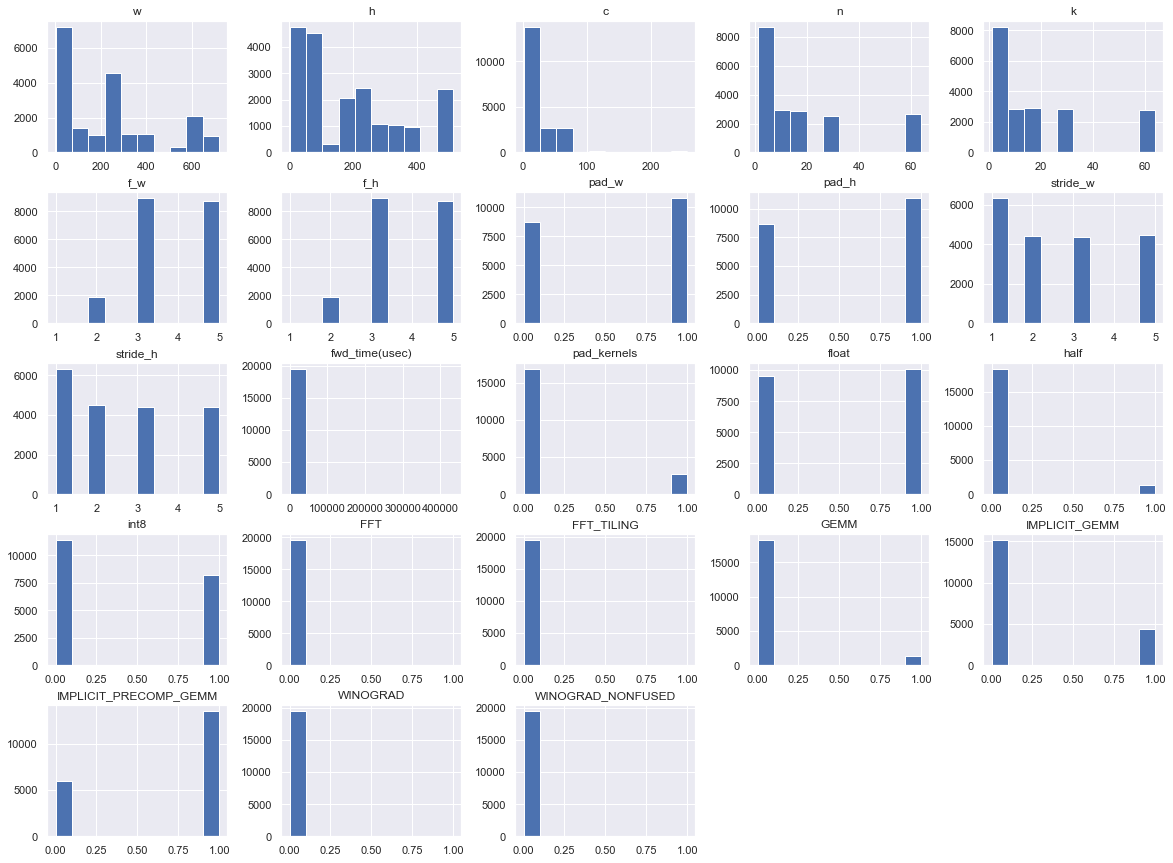

In [80]:
fig = plt.figure()
df.hist(figsize=(20,15))

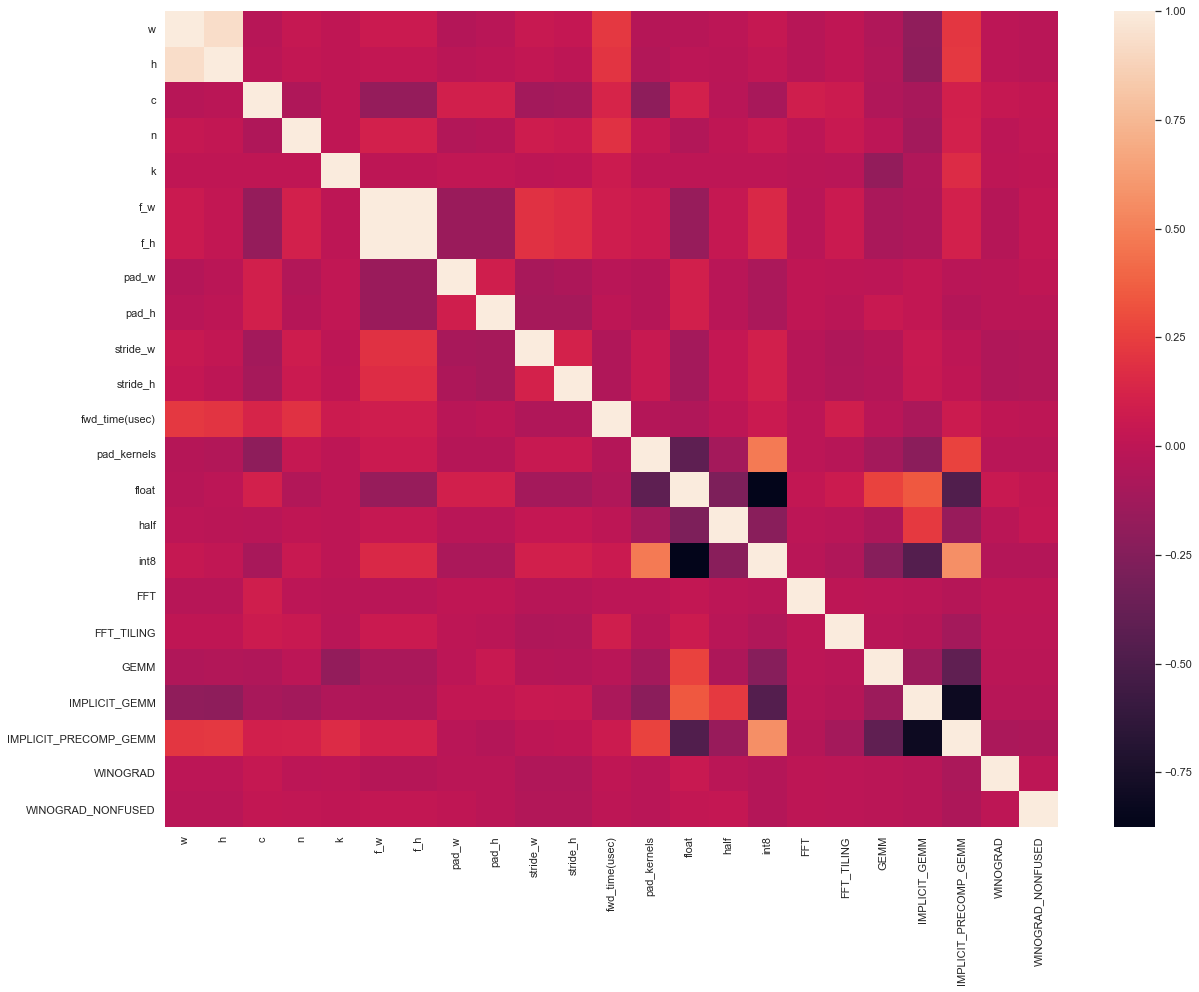

In [81]:
fig = plt.figure(figsize=(20,15))
ax = sns.heatmap(df.corr())

In [101]:
y = df['fwd_time(usec)']
X = df.drop(columns=['fwd_time(usec)'])

X, y = normalize(X, y)

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [102]:
clf = MLPRegressor(max_iter=1000)
clf.fit(X, y)
y_pred = clf.predict(X_train)
score = clf.score(X_train, y_train)
score

0.800308986031634